### Model Validation

Consists of steps/processes that ensure your model performs as expected on new data.

Most common method:
- test model's **accuracy** on dat it has never seen before - ie. holdout set

Can also consist of:
- choosing the right model
- best parameters
- the best accuracy metrics

#### Train/Test Splitting

Train/test splitting should always be tested closely.
- **Cross-Validation** overcomes the challenges of the Hold-outsets that could be encountered
    - *this is detailed further down*

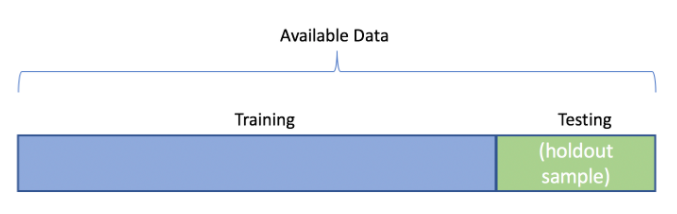

In [ ]:
#determining the effects of train/test split on MAE score

#Sample 1 from one split
print('Testing error: {0:.2f}'.format(mae(v1_y_test, rfR.predict(v1_X_test))))

#Sample 2 from a different split
print('Testing error: {0:.2f}'.format(mae(v2_y_test, rfR.predict(v2_X_test))))

Splitting the data and ensuring a hold-out test set is crucial to ensuring the model performs well.
- generally the most common split is 80/20
- **when there's little data available** we may want to increase the training dataset to 90/10
- **when the model is computationally expensive** may want to lower the training set 70/30

Ultimate Goal of Model Validation
- to end up with the best performing model possible that acheives high accuracy on new data

In [ ]:
#Basic Modeling Steps

#1 - Instantiating the Model & its Parameters
model = RandomForestRegressor(n_estimators=500, random_state=1111)
#to see which parameteres went into the model
model.get_params()

#2 - Fit the model
model.fit(X=X_train, y=y_train)

#3 - Predict with the model
predictions = model.predict(X_test)

#4 - print metrics
print("{0:.2f}".format(mae(y_true=y_test, y_pred=predictions)))

#### Validation Dataset

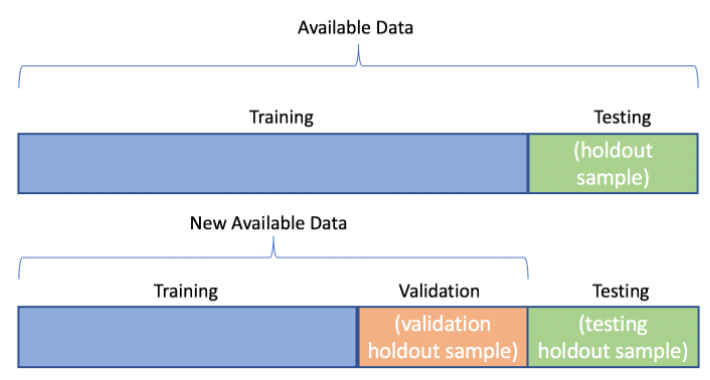

In [ ]:
#to arrive at another holdout sample for validation
#split two times

#1 - the first split to split the training and testing sets
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=1111)

#2 - here we split the X_temp/y_temp further
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=1111)

### Seen vs. Unseen Data

In [ ]:
model = RandomForestRegressor(n_estimators=500, random_state=1111)
model.fit(X=X_train, y=y_train)

#Training data = seen data
train_pred = model.predict(X_train)
train_error = mae(y_true=y_train, y_pred=train_predictions)

#Testing data = unseen data
test_pred = model.predict(X_test)
test_error = mae(y_true=y_test, y_pred=test_predictions)

# Print the accuracy for seen and unseen data
print("Model error on seen data: {0:.2f}.".format(train_error))
print("Model error on unseen data: {0:.2f}.".format(test_error))

### Validation for Regression Models

In [ ]:
from sklearn.ensemble import RandomForestRegressor

#parameters can be set when the model is instantiated 
#OR it can be set later --> this could be useful when trying to test different sets of params
rfR = RandomForestRegressor(n_estimators=50, max_depth=10, random_state=1111)


#selecting for feature importance
# Print how important each column is to the model
for i, item in enumerate(rfRfeature_importances_):
    # Use i and item to print out the feature importance of each column
    print("{0:s}: {1:.2f}".format(X_train.columns[i], item))

##### MAE: Mean Absolute Error

- Average absolute differences between the predictions and actual values.

In [ ]:
#can calculate in two ways:

#manually
sum(abs(y_test - test_predictions))/len(test_predictions)

#or scikit learn
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, test_predictions)

##### MSE: Mean Squared Error

- most widely used regression metric
- allows outlier errors to contribute more to the overall error

In [ ]:
#also can be calculated two ways:

#manually
sum(abs(y_test - test_predictions)**2)/len(test_predictions)

#or scikit learn
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, test_predictions)

### Validation for Classification Models
- ie. what category a prediction falls into

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfC = RandomForestClassifier(random_state=1111)

#how many records were assigned to each class
pd.Series(rfC.predict(X_test)).value_counts()

#series of probabilities for each class
rfC.predict_proba(X_test)

Classification Metrics:
- Precision
- Recall (ie. sensitivity)
- Accuracy
- Specificity
- F1-Score and its variations

#### Confusion Matrix

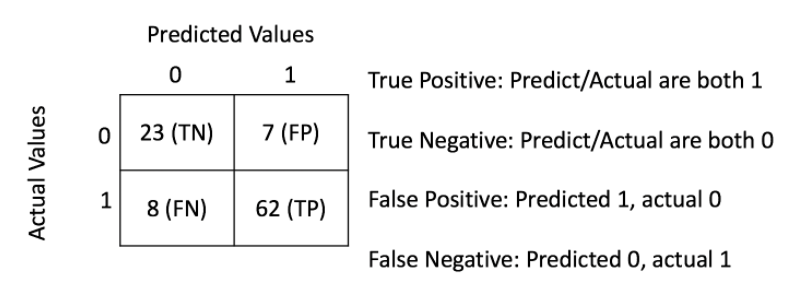

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, test_predictions)

print(cm)

##### Accuracy

- Overall model's ability to correctlly predict the correct classification

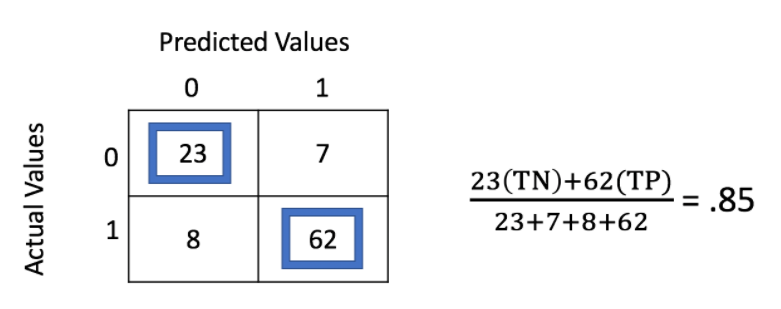

##### Precision

- Number of true positives out of all predicted positive values
- Used we don't want to **overpredict** positive values

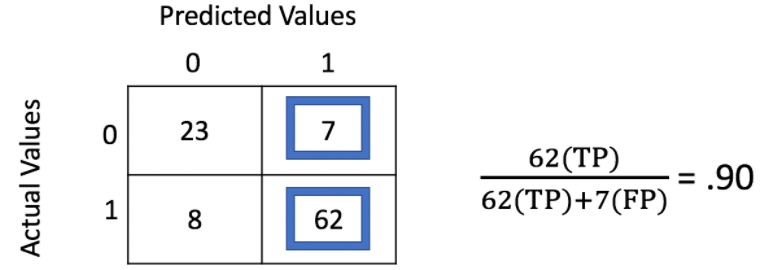

##### Recall

- finding ALL positive values

In [ ]:
from sklearn.metrics import confusion_matrix

# Create predictions
test_predictions = rfc.predict(X_test)

# Create and print the confusion matrix
cm = confusion_matrix(y_test, test_predictions)
print(cm)

# Print the true positives (actual 1s that were predicted 1s)
print("The number of true positives is: {}".format(cm[1, 1]))

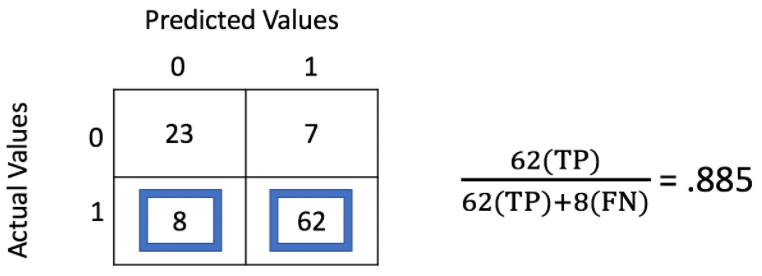

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

test_predictions = rfc.predict(X_test)

accuracy_score(y_test, test_predictions)
score = precision_score(y_test, test_predictions)

# Print the final result
print("The precision value is {0:.2f}".format(score))

### Bias - Variance Trade-off

Variance 
- models follow the training data too closely; fails to generalize to the test data
- **low training error but high testing error**
- considered to be **overfit** and have high complexity

Overfit
- models start to attach meaning to the noise in the data

Bias:
- model fails to find the relationship between the data and the output
- **high training error AND high testing error*
- associated with an **underfit** model

Underfit:
- model fails to have found the underlying patterns within the data

Parameters
- some parameters may affect performance on overfitting/underfitting. 
- to check a **poorly** fit model is to try additional parameter sets and check both the training and testing error metrics

Useful actions:
- 1 - Explore various parameter sets
- 2 - Check the difference between the testing and training errors at each stage
- 3 - Improve accuracy by almost 10% over the first model

### Cross-Validation

Running the model on multiple validation sections, not just one.
- This ultimately will overcome the error issues one might encounter with presetting the train/test/validation splits.
- This also ensures that only 1 validaton set is used only 1 time.

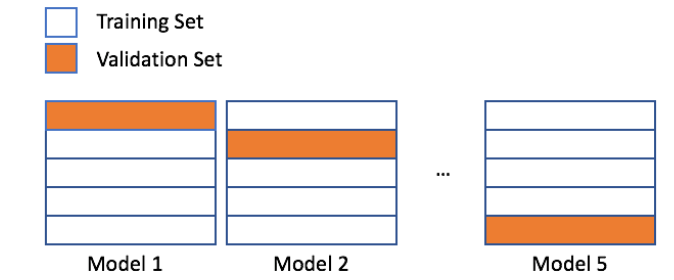

#### K-Fold Cross-Validation

In [ ]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5)
#shuffle = if shuffling data before splitting
#random_state = for reproducibility

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, make_scorer

rfC = RandomForestClassifier()
mse = make_score(mean_squared_error)

cv_results = cross_val_score(rfC, X, y, cv=5, scoring=mse)

#### LOOCV - leave-one-out-cross-validation (where K =n )

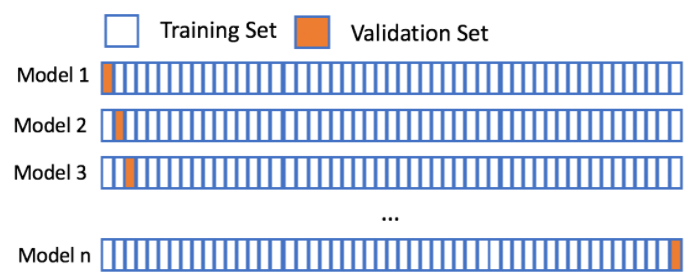

When to use:
- amount of training dataa is limited
- want absolute best error estimate for new data

Caution:
- computationally expensive
- if you have a lot of data
- or if you have a lot of parameters to test

In [ ]:
cv_results = cross_val_score(estimator, X, y, scoring=mse, cv=n)
print(cv_results)

#overall error metric
print(cv_result.mean())